# Canada CPI Visualization

In [3]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_cad = pd.read_csv('./data/Canada-CPI-2018-2023.csv')
df_cad.head()

,REF_DATE,GEO,DGUID,Products and product groups,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2018-07,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.2,134.3,NaN,NaN,NaN,1
1,2018-08,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.2,134.2,NaN,NaN,NaN,1
2,2018-09,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.2,133.7,NaN,NaN,NaN,1
3,2018-10,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.2,134.1,NaN,NaN,NaN,1
4,2018-11,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.2,133.5,NaN,NaN,NaN,1


In [5]:
df_gat = pd.read_csv('./data/Ontario-CPI-2018-2023.csv')
df_gat.head()

,REF_DATE,GEO,DGUID,Products and product groups,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2018-07,Ontario,2016A000235,All-items,2002=100,17,units,0,v41691919,14.2,136.0,NaN,NaN,NaN,1
1,2018-08,Ontario,2016A000235,All-items,2002=100,17,units,0,v41691919,14.2,135.9,NaN,NaN,NaN,1
2,2018-09,Ontario,2016A000235,All-items,2002=100,17,units,0,v41691919,14.2,135.2,NaN,NaN,NaN,1
3,2018-10,Ontario,2016A000235,All-items,2002=100,17,units,0,v41691919,14.2,135.6,NaN,NaN,NaN,1
4,2018-11,Ontario,2016A000235,All-items,2002=100,17,units,0,v41691919,14.2,135.1,NaN,NaN,NaN,1


## Let's take a look at Canada CPI changes first

In [6]:
df_cad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REF_DATE                     915 non-null    object 
 1   GEO                          915 non-null    object 
 2   DGUID                        915 non-null    object 
 3   Products and product groups  915 non-null    object 
 4   UOM                          915 non-null    object 
 5   UOM_ID                       915 non-null    int64  
 6   SCALAR_FACTOR                915 non-null    object 
 7   SCALAR_ID                    915 non-null    int64  
 8   VECTOR                       915 non-null    object 
 9   COORDINATE                   915 non-null    float64
 10  VALUE                        915 non-null    float64
 11  STATUS                       0 non-null      float64
 12  SYMBOL                       0 non-null      float64
 13  TERMINATED          

In [7]:
# change REF_DATE datatype to datetime
df_cad['REF_DATE'] = pd.to_datetime(df_cad['REF_DATE'])
df_gat['REF_DATE'] = pd.to_datetime(df_gat['REF_DATE'])
df_cad['REF_DATE'].head()

0   2018-07-01
1   2018-08-01
2   2018-09-01
3   2018-10-01
4   2018-11-01
Name: REF_DATE, dtype: datetime64[ns]

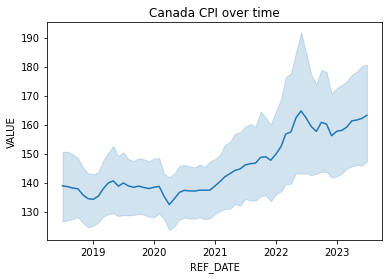

In [8]:
# plot canada cpi over time
sns.lineplot(x='REF_DATE', y='VALUE', data=df_cad)
plt.title('Canada CPI over time')
plt.show()

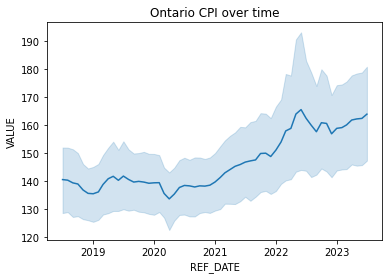

In [9]:
# plot Ontario cpi over time
sns.lineplot(x='REF_DATE', y='VALUE', data=df_gat)
plt.title('Ontario CPI over time')
plt.show()

In [10]:
# filter data Products and product groups to All-items
df_cad_all = df_cad[df_cad['Products and product groups'] == 'All-items']
df_gat_all = df_gat[df_gat['Products and product groups'] == 'All-items']


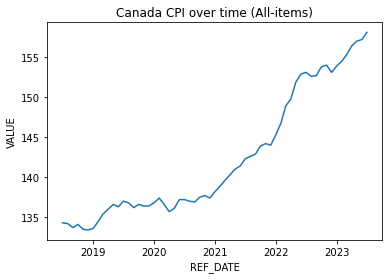

In [11]:
sns.lineplot(x='REF_DATE', y='VALUE', data=df_cad_all)
plt.title('Canada CPI over time (All-items)')
plt.show()

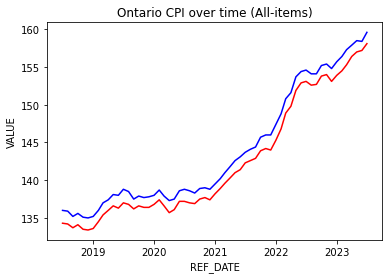

In [12]:
sns.lineplot(x='REF_DATE', y='VALUE', data=df_gat_all, color='blue')
sns.lineplot(x='REF_DATE', y='VALUE', data=df_cad_all, color='red')
plt.title('Ontario CPI over time (All-items)')
plt.show()

## plot the CPI changes over time by products

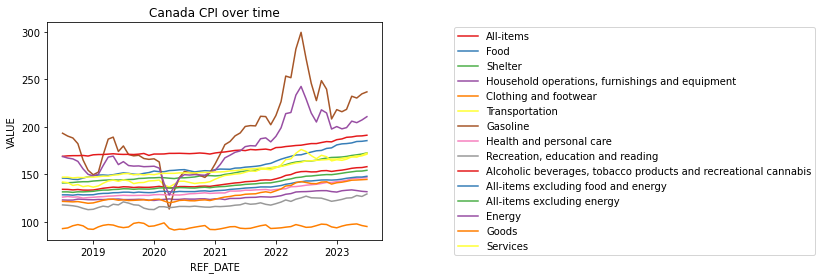

<Figure size 1440x720 with 0 Axes>

In [13]:
# plot canada cpi over time
fg = sns.lineplot(x='REF_DATE', y='VALUE', data=df_cad, hue='Products and product groups', palette="Set1")
plt.title('Canada CPI over time')
plt.figure(figsize=(20,10))
fg.legend(bbox_to_anchor= (1.2,1))
plt.show()

### pick out interesting products to plot

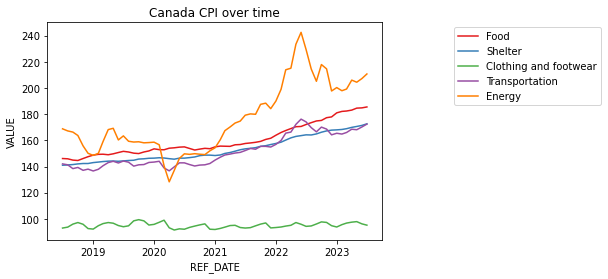

<Figure size 1440x720 with 0 Axes>

In [14]:
# plot canada's cpi for Food, Shelter, Energy, Clothing and footwear, Transportation, Gasoline.
# filter df for only target products
temp_df = df_cad[(df_cad['Products and product groups'] == 'Food') | (df_cad['Products and product groups'] == 'Shelter') | (df_cad['Products and product groups'] == 'Energy') | (df_cad['Products and product groups'] == 'Clothing and footwear')| (df_cad['Products and product groups'] == 'Transportation')]
fg = sns.lineplot(x='REF_DATE', y='VALUE', data=temp_df, hue='Products and product groups', palette="Set1")
plt.title('Canada CPI over time')
plt.figure(figsize=(20,10))
fg.legend(bbox_to_anchor= (1.2,1))
plt.show()

### create month to month CPI change plot
e.g. 2022 Jan CPI vs 2023 Jan CPI

In [36]:
# first take filter date for 2022 and 2023 only
df_cad_22_23 = df_cad[df_cad['REF_DATE'] >= '2022-01-01']
# filter for target products
temp_df = df_cad_22_23[(df_cad_22_23['Products and product groups'] == 'Food') | (df_cad_22_23['Products and product groups'] == 'Shelter') | (df_cad_22_23['Products and product groups'] == 'Energy') | (df_cad_22_23['Products and product groups'] == 'Clothing and footwear')| (df_cad_22_23['Products and product groups'] == 'Transportation')]

# create month column
temp_df['month'] = temp_df['REF_DATE'].dt.month
temp_df['year'] = temp_df['REF_DATE'].dt.year
# group by product and month, then do percentage change
# since each data is unique, so using max to select the value is fine
temp_df = temp_df.groupby(['Products and product groups', 'month', 'year']).max('VALUE').reset_index()

temp_df.head()



<ipython-input-36-c5fd7592531e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['month'] = temp_df['REF_DATE'].dt.month
<ipython-input-36-c5fd7592531e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = temp_df['REF_DATE'].dt.year


,Products and product groups,month,year,UOM_ID,SCALAR_ID,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,Clothing and footwear,1,2022,17,0,2.139,93.4,NaN,NaN,NaN,1
1,Clothing and footwear,1,2023,17,0,2.139,93.8,NaN,NaN,NaN,1
2,Clothing and footwear,2,2022,17,0,2.139,93.8,NaN,NaN,NaN,1
3,Clothing and footwear,2,2023,17,0,2.139,95.6,NaN,NaN,NaN,1
4,Clothing and footwear,3,2022,17,0,2.139,94.5,NaN,NaN,NaN,1


In [37]:
temp_df[temp_df['Products and product groups'] == 'Food']

,Products and product groups,month,year,UOM_ID,SCALAR_ID,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
38,Food,1,2022,17,0,2.3,163.9,NaN,NaN,NaN,1
39,Food,1,2023,17,0,2.3,181.0,NaN,NaN,NaN,1
40,Food,2,2022,17,0,2.3,166.0,NaN,NaN,NaN,1
41,Food,2,2023,17,0,2.3,182.1,NaN,NaN,NaN,1
42,Food,3,2022,17,0,2.3,167.5,NaN,NaN,NaN,1
43,Food,3,2023,17,0,2.3,182.4,NaN,NaN,NaN,1
44,Food,4,2022,17,0,2.3,169.0,NaN,NaN,NaN,1
45,Food,4,2023,17,0,2.3,183.1,NaN,NaN,NaN,1
46,Food,5,2022,17,0,2.3,170.4,NaN,NaN,NaN,1
47,Food,5,2023,17,0,2.3,184.6,NaN,NaN,NaN,1


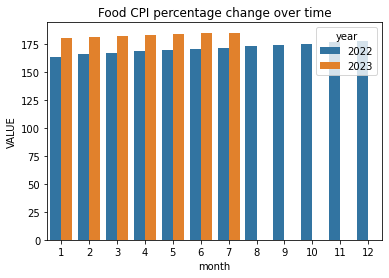

In [38]:
# plot Food percentage change in bar chart
# so each month has two bar in is that month in 2022 other is 2023
# so we have 12 month * 2 year = 24 bar
sns.barplot(x='month', y='VALUE', data=temp_df[temp_df['Products and product groups'] == 'Food'], hue='year')
plt.title('Food CPI percentage change over time')
plt.show()